In [36]:
import pickle
import numpy as np

#files = ['accuracy.dat','accuracy_new300.dat','accuracy_new300_2.dat','accuracy_new300_3.dat','accuracy_new300_3_stratified.dat']
files = ['accuracy_new100_3_depth6.dat','accuracy_new100_3_depth6_fsq2.dat']

with open('top10.dat') as f:
    state_top10 = pickle.load(f)
f.close()
for (i,s) in enumerate(state_top10):
    state_top10[i] = s.replace('"','')

auc_mean = []
auc_ci = []
for (i,file) in enumerate(files):
    with open(file) as f:
        if file=='accuracy_new100_3_depth6_fsq2.dat' or file=='accuracy_new100_3_depth6.dat':
            aucs, confs, labels, aucs_fsq, confs_fsq = pickle.load(f)
        else:
            aucs, confs, labels = pickle.load(f)
            # removing extra quotations (temporary - should be corrected from source)
            for (j,lab) in enumerate(labels):
                for (k,l) in enumerate(lab):
                    labels[j][k] = l.replace('"','')
    f.close()
    
        
    auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
    auc_top10_fsq = list(np.array([]) for ii in range(len(state_top10)))
    conf_top10 = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
    conf_top10_fsq = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
    for (k,lab) in enumerate(labels):
        for (j,state) in enumerate(state_top10):
            if state in lab:
                ind = np.where(lab==state)[0]
                auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
                if file=='accuracy_new100_3_depth6_fsq2.dat':
                    auc_top10_fsq[j] = np.append(auc_top10_fsq[j], aucs_fsq[k][ind])
                for (j2,state2) in enumerate(state_top10):
                    if state2 in lab:
                        ind2 = np.where(lab==state2)[0]
                        conf_top10[j][j2] = np.append(conf_top10[j][j2], confs[k][ind,ind2])
                        if file=='accuracy_new100_3_depth6_fsq2.dat':
                            conf_top10_fsq[j][j2] = np.append(conf_top10_fsq[j][j2], confs_fsq[k][ind,ind2])

    auc_mean.append(np.array([]))
    auc_ci.append(np.array([]))
    for (j, a) in enumerate(auc_top10):
        auc_mean[i] = np.append(auc_mean[i], np.nanmean(a))
        auc_ci[i] = np.append(auc_ci[i], 2*np.nanstd(a)/np.sqrt(208))

auc_mean_fsq = np.array([])
auc_ci_fsq = np.array([])
for (i,a) in enumerate(auc_top10_fsq):
    auc_mean_fsq = np.append(auc_mean_fsq, np.nanmean(a))
    auc_ci_fsq = np.append(auc_ci_fsq, 2*np.nanstd(a)/np.sqrt(208))

In [43]:
print confs[0]
print confs_fsq[0]
print labels[0]

[[  0.   5.   0.   0.   0.   5.   4.]
 [  0.   0.   0.   0.   0.   1.   1.]
 [  0.   0.  41.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   0.   0.   0.]
 [  0.   2.   2.   0.   0.   7.   2.]
 [  0.   1.   0.   0.   0.  13.   1.]
 [  0.   0.   0.   0.   0.   0.   0.]]
[[  0.   0.   0.  10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  41.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   1.   0.   1.]
 [  0.   2.   0.   2.   0.   9.]]
["Another's Home" 'Food (Restaurant, Cafe)' 'Home' 'Outdoors & Recreation'
 'Professional or Medical Office' 'Shop or Store' 'Work']


[array([ 0.82187172,  0.75578496,  0.7031321 ,  0.68832279,  0.75241417,
        0.73897275,  0.67890463,  0.64979284,  0.8802923 ,  0.72923571]), array([ 0.84039588,  0.82541474,  0.5543974 ,  0.74193261,  0.74898582,
        0.76989731,  0.69945684,  0.69841727,  0.88410676,  0.78121061])]


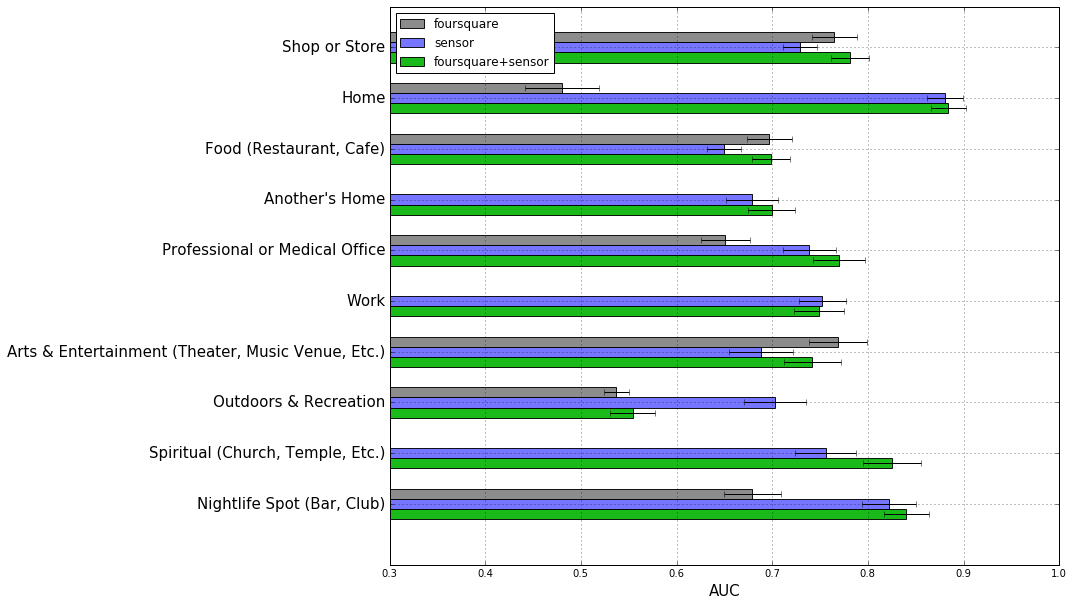

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
w = 1/(float(len(auc_mean))+3)
plt.barh(np.arange(2*w,10+2*w,1), auc_mean_fsq, w, xerr=auc_ci_fsq, align='center',\
         color=(.5,.5,.5), alpha=0.9, ecolor=(0,0,0))
plt.barh(np.arange(w,10+w,1), auc_mean[0], w, xerr=auc_ci[0], align='center', \
         color=(.4,.4,1), alpha=0.9, ecolor=(0,0,0))
plt.barh(np.arange(0,10,1), auc_mean[1], w, xerr=auc_ci[1], align='center', \
         color=(0,.7,0), alpha=0.9, ecolor=(0,0,0))
plt.legend(['foursquare','sensor','foursquare+sensor'], loc=2)
plt.xlabel('AUC',fontsize=15,color=(0,0,0))
axes = plt.gca()
axes.set_ylim([-1, len(state_top10)])
axes.set_xlim([0.3, 1])
plt.yticks(np.arange(.2,10.2,1), state_top10, fontsize=15, color=(0,0,0));
#plt.xticks(np.arange(0,1,.05), np.arange(0,1,.05), fontsize=12, color=(0,0,0));
#plt.plot([.5, .5], [-1, len(state_top10)],color=(0,0,0))
plt.grid()
print auc_mean

In [12]:
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

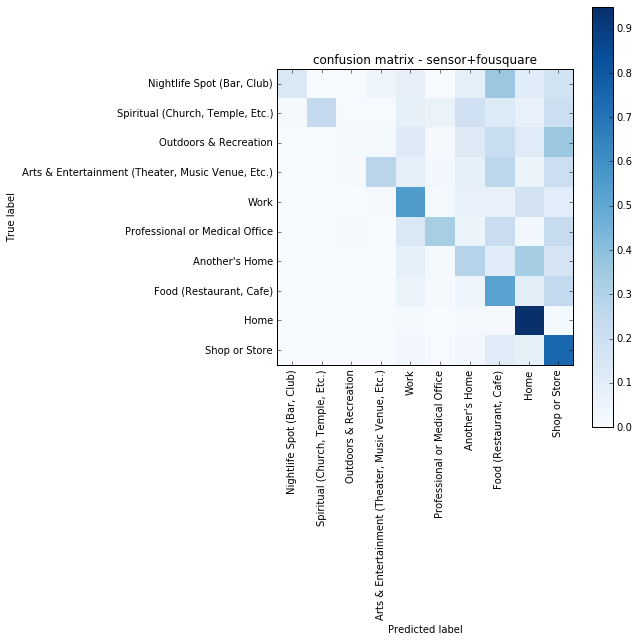

In [34]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confusion matrix - sensor+fousquare')

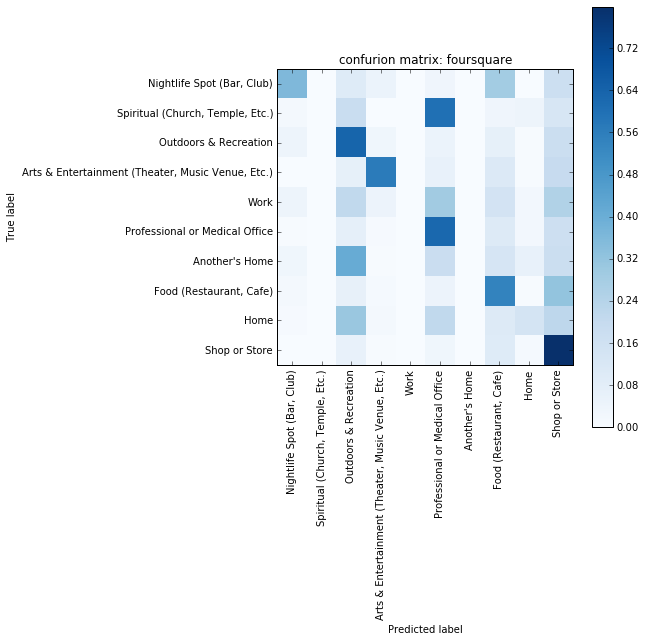

In [35]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10_fsq):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10_fsq[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confurion matrix: foursquare')

In [ ]:
# plotting confusion matrix for foursquare